<h1 align='center'> CS353 Machine Learning Lab</h1>
<h1 align='center'>Lab-2 (22/01/21)</h1>
<h2 align='center'>Shumbul Arifa (181CO152)</h2>

# Dataset

Movie dataset for classification model, with "Start_Tech_Oscar" as the label.

To create a decision tree, there are various criterions for splitting the attributes. Three major criterions are

- ID3 (Iterative Dichotomiser 3)
- C4.5
- Gini (Classification and Regression Trees or CART)

We will first visualize and clean the dataset.\
Then, we will perform the above 3 classifications, and we will plot the graphs for each of them.\
Then, we will repeat the same thing using pruning.


At the end, all the three algorithm's accuracy are compared 

# 1. Basic imports and reading in the dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [306]:
df = pd.read_csv("Movie_classification.csv")
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [307]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

From the above information, we can see that there are some NULL values in the attribute "Time_taken". \
Thus, data preprocessing has to be done to treat the missing values.

# Data Preprocessing

This is a very important part of any machine learning model processing, because in real life data is ussually not in the correct format. 
In the current dataset, the attributes that are needed to be taken care of are:

1. Time_taken 
It has some missing values. So, we replace those values with the mean value of all the values.


2. 3D_available
This attribute has polunomial type variables, i.e "yes" or "no".


3. Genre
This attribute has polunomial type variables too.

To handle '3D_available' and 'Genre', we use dummy variable method.

## 2.1 MISSING VALUE IMPUTATION

In [308]:
x=df["Time_taken"].mean()
print("Mean value in the attribute 'Time_taken' is ", x)

Mean value in the attribute 'Time_taken' is  157.39149797570855


In [309]:
df["Time_taken"].fillna(value = x, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

## 2.2 Converting all categorical variables into numerical variables

From the data information, we can see that the attributes "3D_available" and "Genre" are string type (object).\
Thus, to convert these categorical values in the 2 attributes, we use dummy variables.

In [310]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


We know that:
> the numbers of dummy variable = 1 - numbers of categories in each variable

Thus, we need
> 1 variable for "3D_available" \
> 3 variables for "Genre"

In [311]:
df=pd.get_dummies(df, columns = ['3D_available','Genre'], drop_first= True)
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


Now, the categorical variables are converted to numerical variables.\
For "Genre", we now have 3 attributes, "Genre_Comedy", "Genre_Drama" and "Genre_Thriller". \
And, "3D_available" is now "3D_available_YES".

# 3. Splitting data

## 3.1 Split data using X-y split method

In [314]:
X=df.loc[:, df.columns!="Start_Tech_Oscar"]
X.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


## 3.2 Analyzing

In [315]:
y=df["Start_Tech_Oscar"]
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Start_Tech_Oscar, dtype: int64

In [316]:
## Analyzing number of attributes in each

print(df.shape)
print(X.shape)
print(y.shape)

(506, 21)
(506, 20)
(506,)


The number of columns in the modified dataset is 21. \
Thus, X has 20 columns and y is a Series of single column, that is the label for our dataset.


# 4. Training and tesing

In [317]:
from sklearn.model_selection import train_test_split

In [398]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [399]:
X_train.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
97,22.4166,60.78,0.555,44823.295,149.5,8.150,8.340,8.215,8.305,7.40,543618,125.48,246.192,53,413,77400,1,0,0,1
130,26.8012,98.78,0.376,35874.190,172.4,8.815,9.035,8.820,9.095,6.76,466796,179.68,263.072,25,663,38400,1,1,0,0
477,320.4680,91.20,0.386,29463.720,170.8,8.860,9.005,8.795,9.135,6.96,340338,186.80,301.920,39,620,24000,0,0,1,0
345,20.6226,63.78,0.558,33407.770,122.0,5.880,6.045,5.885,6.165,7.24,494404,143.00,262.800,26,507,35000,1,0,1,0
84,21.0118,63.98,0.551,35490.895,121.5,7.515,7.645,7.505,7.775,7.30,454277,133.56,283.824,23,422,47800,0,0,1,0


In [400]:
X_test.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
305,21.0958,59.36,0.528,36751.880,131.6,8.185,8.475,8.175,8.425,7.32,462490,131.36,304.544,22,454,56800,0,1,0,0
193,20.4374,60.86,0.599,37774.000,83.4,6.770,6.935,6.775,7.080,7.88,503965,136.44,264.976,24,412,62200,0,0,0,1
65,20.7168,61.74,0.602,34940.950,91.3,6.690,6.785,6.575,6.725,8.78,545499,189.40,243.760,20,375,47000,0,0,0,1
349,20.5798,57.50,0.571,38546.145,108.0,5.560,5.730,5.515,5.605,8.06,495540,112.64,224.256,30,393,53200,1,1,0,0
151,49.9264,94.16,0.129,30019.220,173.5,9.070,9.270,9.115,9.365,8.06,466687,129.84,223.136,42,754,39200,0,0,0,1


In [401]:
y_train.head()

97     0
130    1
477    1
345    0
84     1
Name: Start_Tech_Oscar, dtype: int64

In [402]:
y_test.head()

305    0
193    0
65     0
349    1
151    1
Name: Start_Tech_Oscar, dtype: int64

<h1 align='center'> ID3 Classifier</h1>

## Training regression tree

In [550]:
from sklearn import tree

id3 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
id3 = id3.fit(X_train, y_train)

## Predicting values using trained model

In [404]:
y_train_pred = id3.predict(X_train)
y_test_pred = id3.predict(X_test)

In [405]:
y_test_pred

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

## Model Performance

In [333]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [406]:
confusion_matrix(y_train, y_train_pred)

array([[140,  16],
       [113,  85]])

In [407]:
confusion_matrix(y_test, y_test_pred)

array([[57, 17],
       [41, 37]])

In [551]:
print("Accuracy score of ID3 Model: ",  id3.score(X_test, y_test))

Accuracy score of ID3 Model:  0.6578947368421053


## Plotting

In [344]:
!pip install graphviz
!pip install pydotplus

In [3]:
import graphviz 
dot_data = tree.export_graphviz(id3, out_file=None, feature_names=X_train.columns, filled=True)

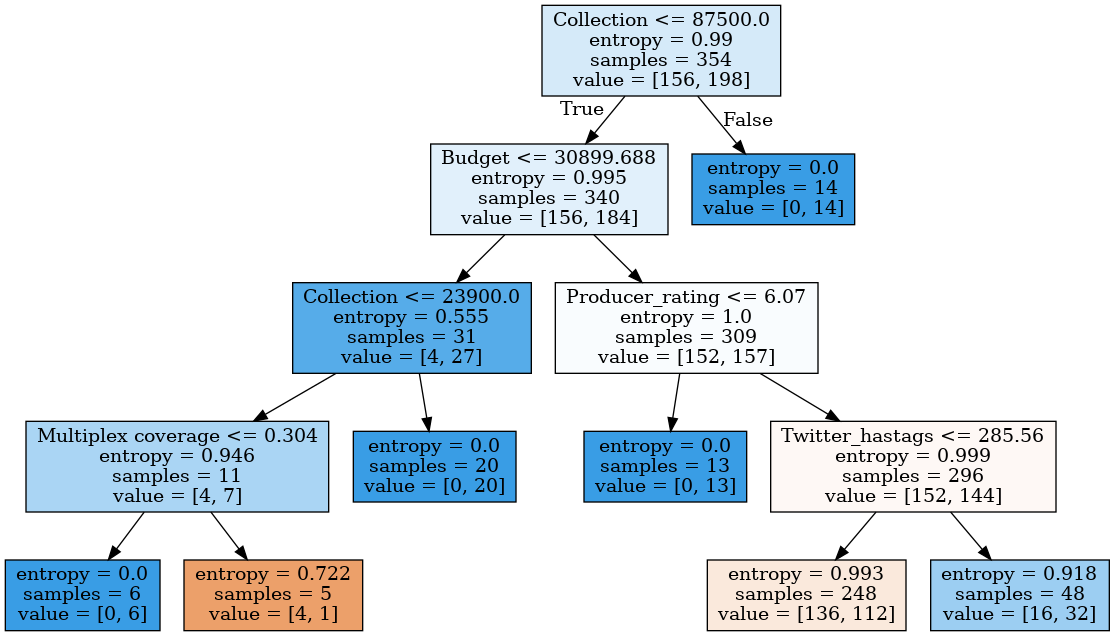

In [410]:
from IPython.display import Image
import pydotplus

graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Pruning

### Maximum number of levels in tree

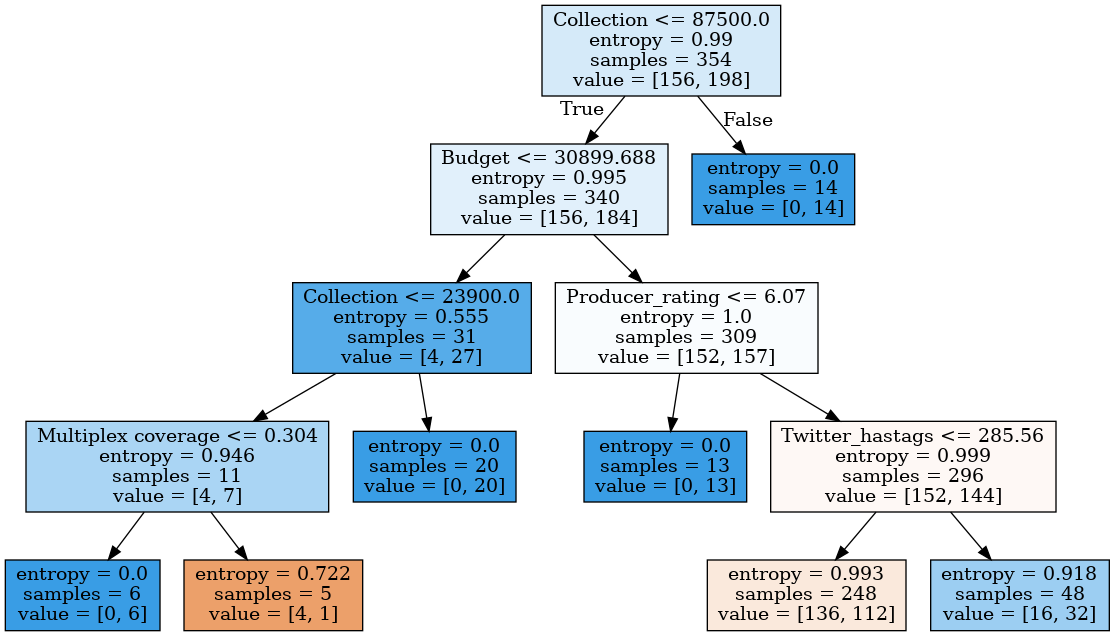

In [411]:
ptree1=tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
ptree1.fit(X_train, y_train)
dot_data = tree.export_graphviz(ptree1, out_file=None, feature_names=X_train.columns, filled=True)

graph1=pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())

### Minimum obervations at internal nodes

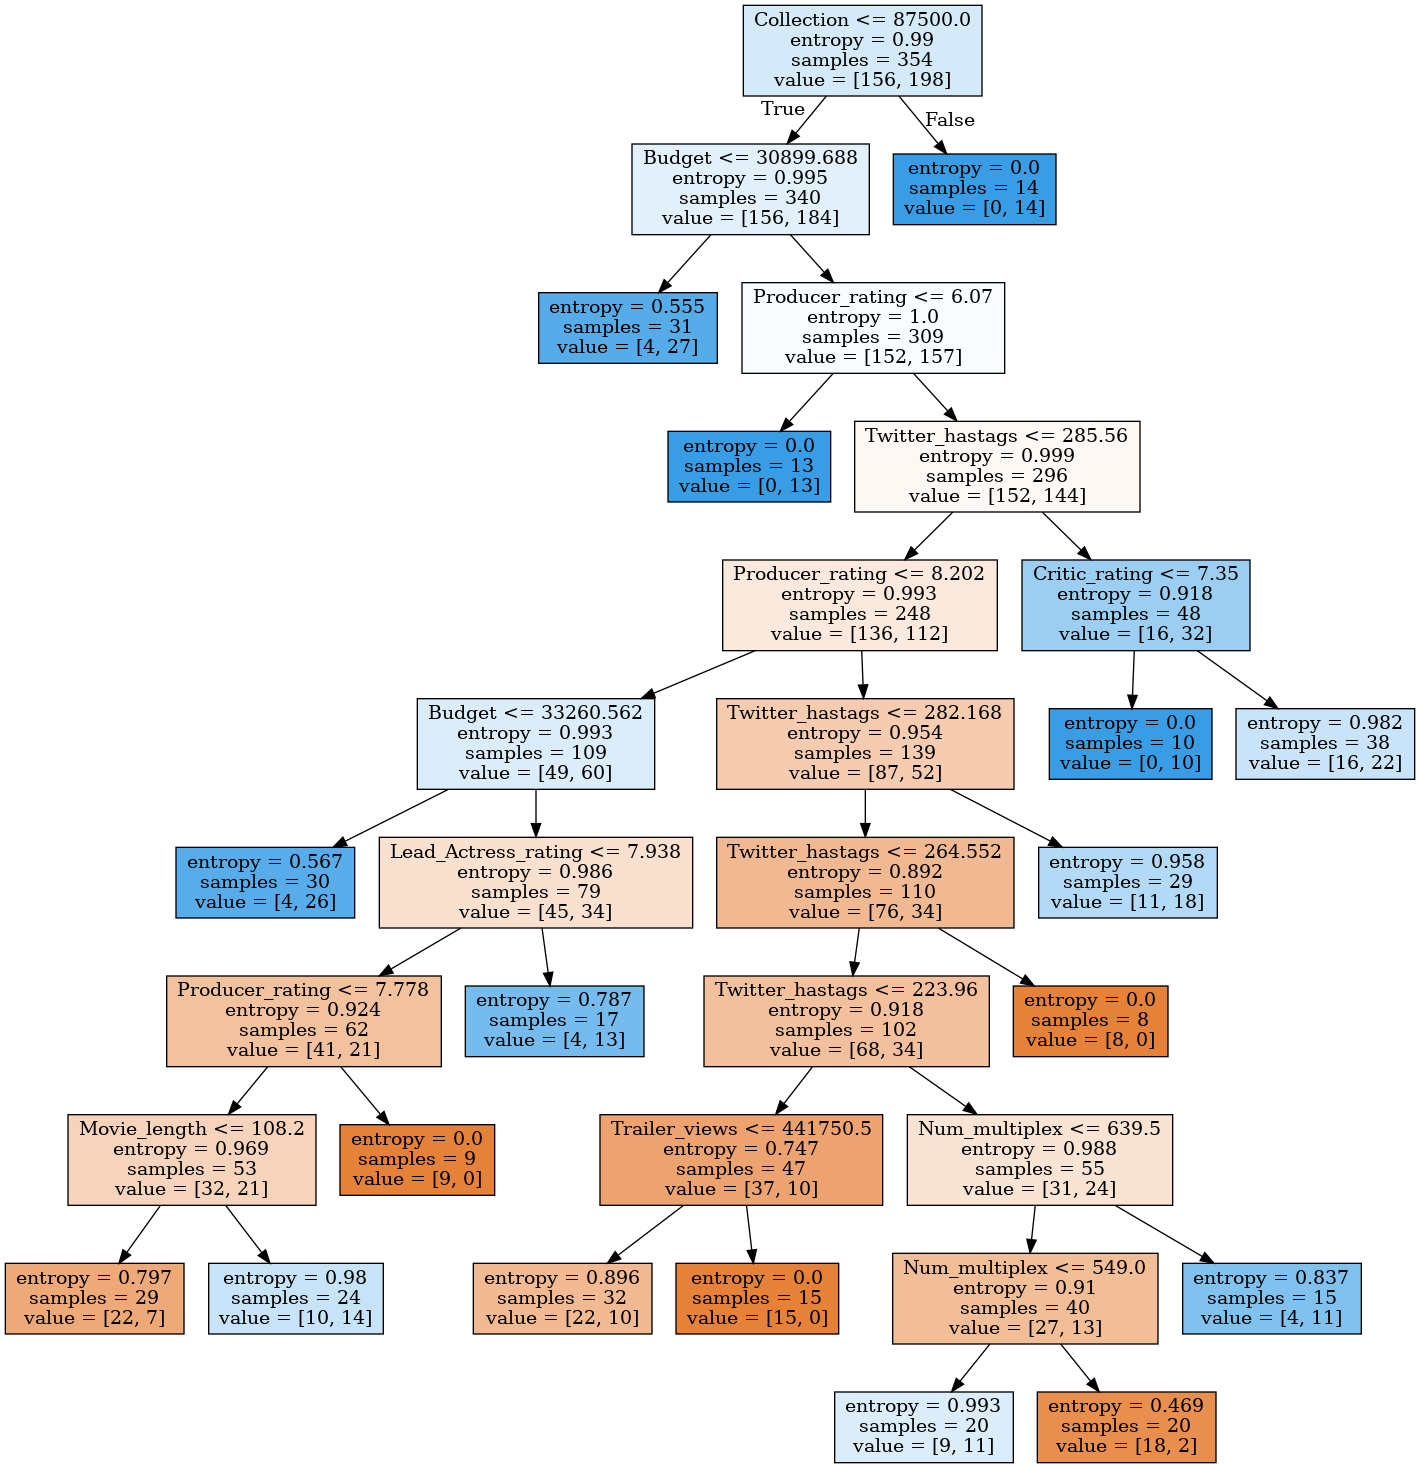

In [412]:
ptree2=tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=40)
ptree2.fit(X_train, y_train)
dot_data = tree.export_graphviz(ptree2, out_file=None, feature_names=X_train.columns, filled=True)

graph2=pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

### Minimum obervations at leaf nodes

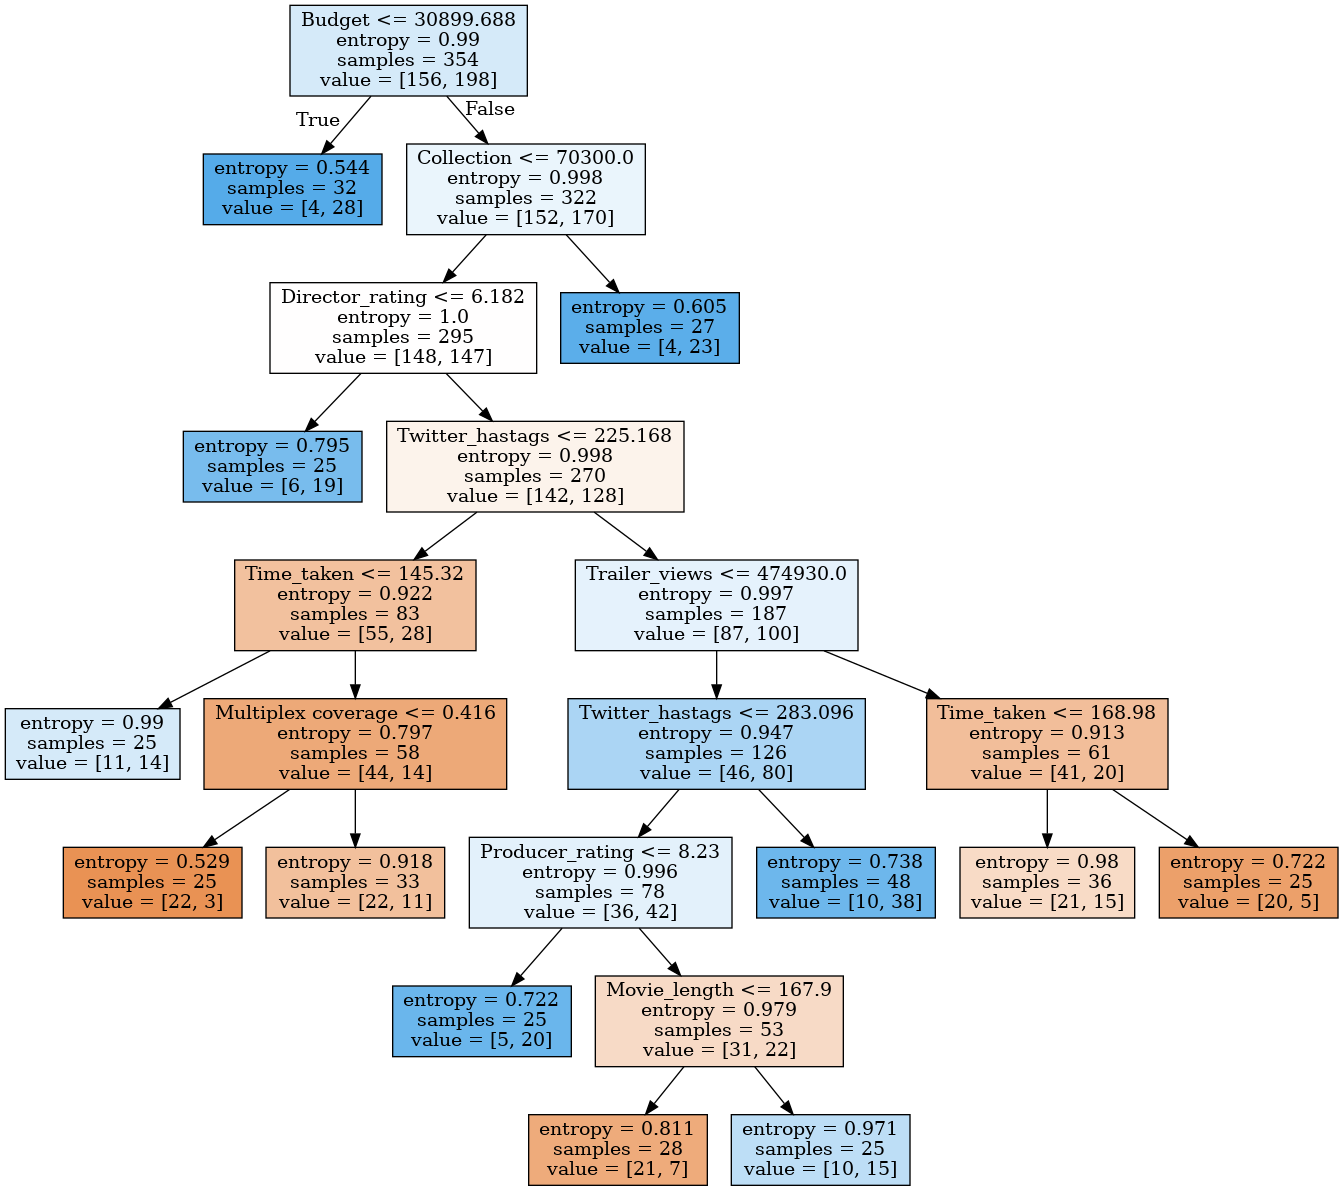

In [413]:
ptree3=tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=25)
ptree3.fit(X_train, y_train)
dot_data = tree.export_graphviz(ptree3, out_file=None, feature_names=X_train.columns, filled=True)

graph3=pydotplus.graph_from_dot_data(dot_data)
Image(graph3.create_png())

In [441]:
ptree4=tree.DecisionTreeClassifier(criterion='entropy',min_samples_split=5)
ptree4.fit(X_train, y_train)

ptree4.score(X_train, y_train)

0.980225988700565

<h1 align='center'> C4.5 Classifier</h1>

In [470]:
from chefboost import Chefboost as chef
config = {'algorithm': 'C4.5'}

In [471]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller,Decision
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,223.840,23,494,48000,1,1,0,0,1,type1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,243.456,42,462,43200,0,0,0,1,0,type0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,2022.400,38,458,69400,1,0,1,0,0,type1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,225.344,45,472,66800,1,1,0,1,0,type1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,225.792,55,395,72400,1,0,0,1,0,type1


In [558]:
y=df["Start_Tech_Oscar"]
df['Decision'] = pd.Series(y)
df['Decision'] = df['Decision'].replace({0:"type0" , 1: "type1"});
train=df.sample(frac=0.8,random_state=15)
test=df.drop(['Start_Tech_Oscar'], axis = 1)

In [560]:
print(train.shape)
train.head()

(405, 22)


,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller,Decision
301,>20.1264,>55.92,>0.5610680561180224,>19781.355,>76.4,>4.854330569761742,>5.025869078201217,>4.843111367178006,>5.044822352537035,>6.6,...,>201.15200000000002,>3,<=863.726772889416,<=81750.09990408715,<=0,>0,<=0,<=0,>0,<=0
262,>20.1264,>55.92,<=0.5610680561180224,>19781.355,>76.4,>4.854330569761742,>5.025869078201217,>4.843111367178006,>5.044822352537035,>6.6,...,>201.15200000000002,>3,<=863.726772889416,>81750.09990408715,>0,>0,<=0,<=0,>0,>0
172,>20.1264,>55.92,<=0.5610680561180224,>19781.355,>76.4,>4.854330569761742,>5.025869078201217,>4.843111367178006,>5.044822352537035,>6.6,...,>201.15200000000002,>3,<=863.726772889416,<=81750.09990408715,<=0,<=0,<=0,<=0,>0,<=0
505,>20.1264,>55.92,<=0.5610680561180224,>19781.355,>76.4,>4.854330569761742,>5.025869078201217,>4.843111367178006,>5.044822352537035,>6.6,...,>201.15200000000002,>3,<=863.726772889416,<=81750.09990408715,<=0,>0,>0,<=0,<=0,<=0
111,>20.1264,>55.92,<=0.5610680561180224,>19781.355,>76.4,>4.854330569761742,>5.025869078201217,>4.843111367178006,>5.044822352537035,>6.6,...,>201.15200000000002,>3,<=863.726772889416,<=81750.09990408715,<=0,>0,<=0,<=0,>0,<=0


In [561]:
print(test.shape)
test.head()

(506, 22)


,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller,Decision,Prediction
0,<=20.1264,>55.92,<=0.5610680561180224,>19781.355,>76.4,>4.854330569761742,>5.025869078201217,>4.843111367178006,>5.044822352537035,>6.6,...,>201.15200000000002,>3,<=863.726772889416,<=81750.09990408715,>0,<=0,<=0,>0,>0,>0
1,>20.1264,>55.92,<=0.5610680561180224,>19781.355,>76.4,>4.854330569761742,>5.025869078201217,>4.843111367178006,>5.044822352537035,>6.6,...,>201.15200000000002,>3,<=863.726772889416,<=81750.09990408715,<=0,<=0,>0,<=0,<=0,<=0
2,>20.1264,>55.92,<=0.5610680561180224,>19781.355,>76.4,>4.854330569761742,>5.025869078201217,>4.843111367178006,>5.044822352537035,>6.6,...,>201.15200000000002,>3,<=863.726772889416,<=81750.09990408715,<=0,>0,<=0,<=0,>0,<=0
3,>20.1264,>55.92,<=0.5610680561180224,>19781.355,>76.4,>4.854330569761742,>5.025869078201217,>4.843111367178006,>5.044822352537035,>6.6,...,>201.15200000000002,>3,<=863.726772889416,<=81750.09990408715,>0,<=0,>0,<=0,>0,>0
4,>20.1264,>55.92,<=0.5610680561180224,>19781.355,>76.4,>4.854330569761742,>5.025869078201217,>4.843111367178006,>5.044822352537035,>6.6,...,>201.15200000000002,>3,<=863.726772889416,<=81750.09990408715,<=0,<=0,>0,<=0,>0,<=0


In [559]:
model = chef.fit(train, config ,test)

C4.5  tree is going to be built...
-------------------------
finished in  0.21778249740600586  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  405  instances
Labels:  ['<=0' '>0']
Confusion matrix:  [[177, 0], [0, 228]]
Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
-------------------------
Evaluate  validation set
-------------------------
Accuracy:  53.952569169960476 % on  506  instances
Labels:  ['>0' '<=0']
Confusion matrix:  [[161, 118], [115, 112]]
Precision:  57.7061 %, Recall:  58.3333 %, F1:  58.018 %


<h1 align='center'> CART Classifier</h1>

In [548]:
from sklearn import tree

cart = tree.DecisionTreeClassifier(criterion='gini',max_depth=3)
cart = cart.fit(X_train, y_train)

print("Accuracy score of CART Model: ",  cart.score(X_test, y_test))

Accuracy score of CART Model:  0.631578947368421


## Plotting

In [428]:
import graphviz 
dot_data = tree.export_graphviz(cart, out_file=None, feature_names=X_train.columns, filled=True)

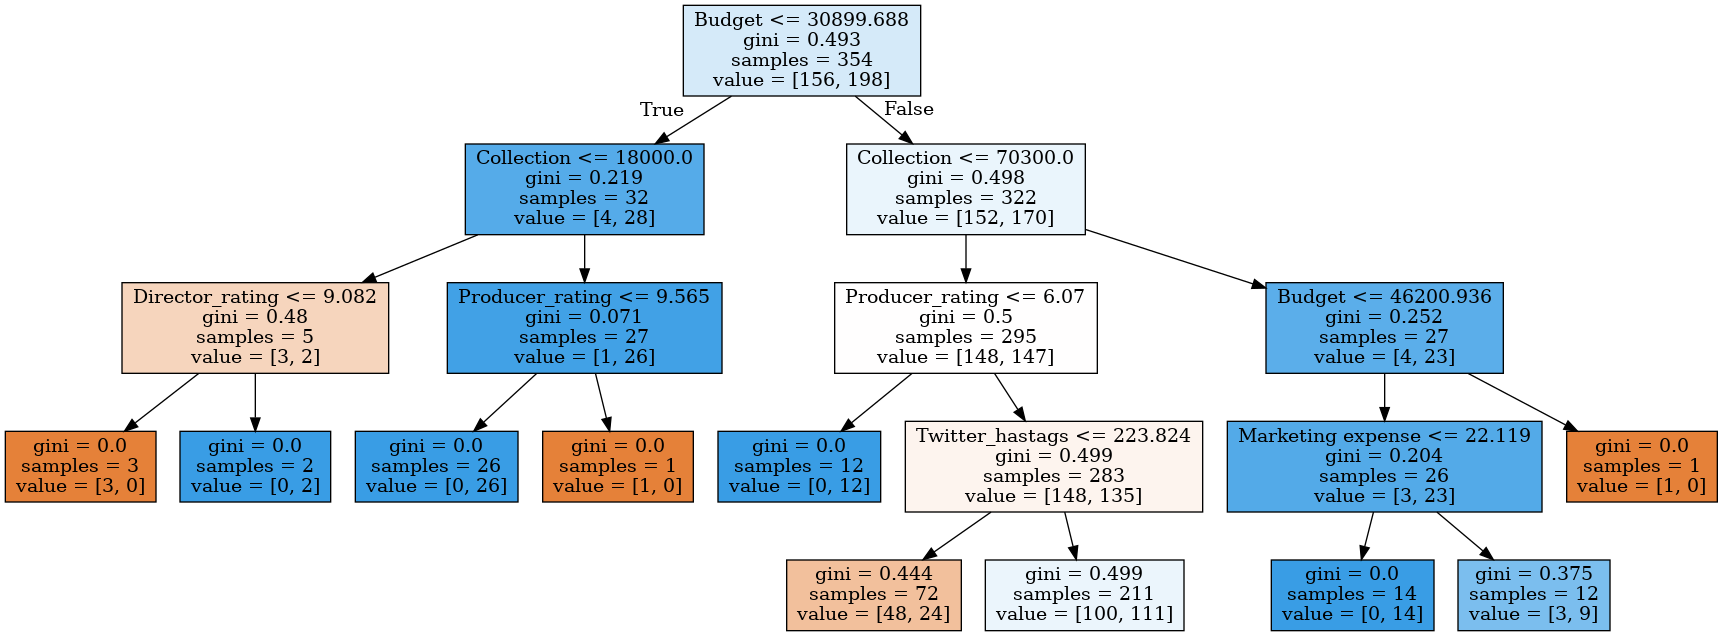

In [429]:
from IPython.display import Image
import pydotplus

graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Pruning

### Maximum number of levels in tree

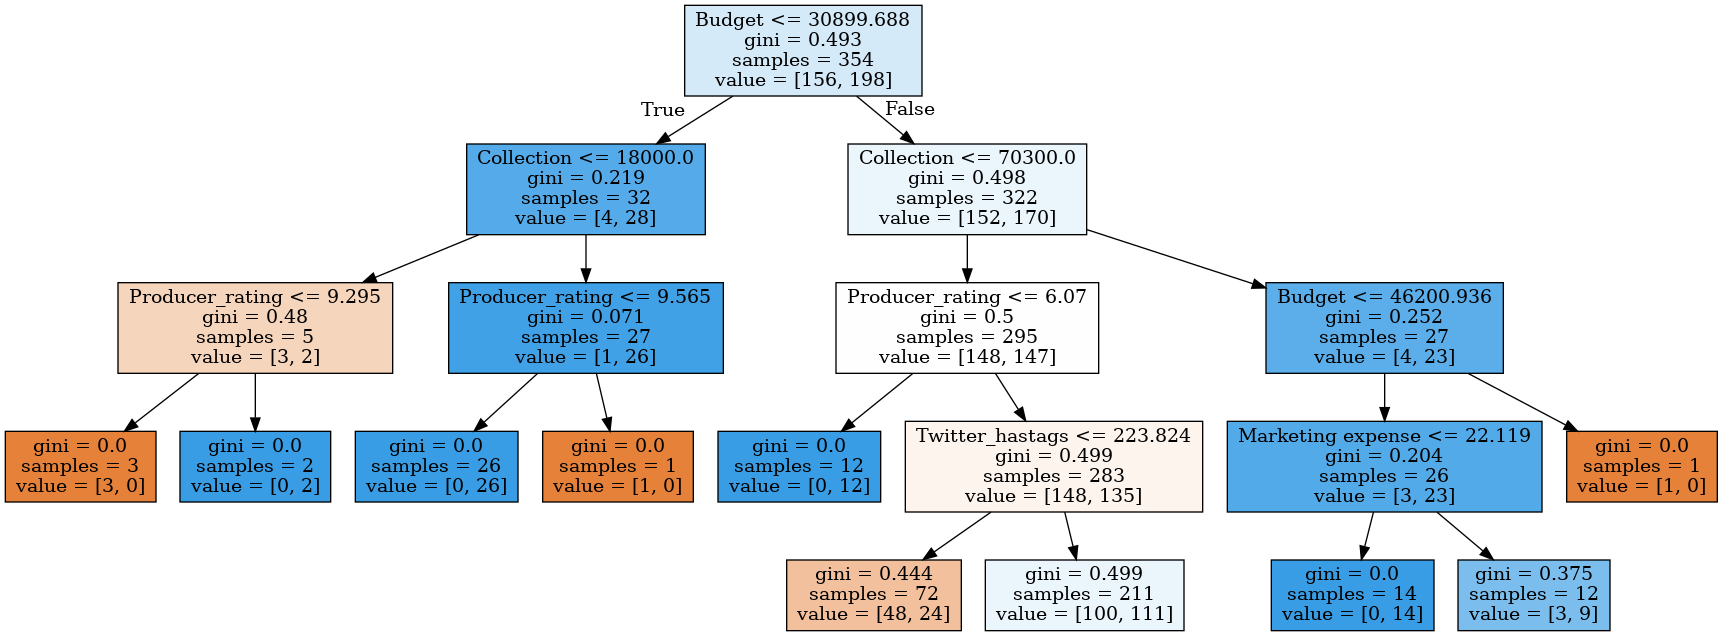

In [427]:
ptree1=tree.DecisionTreeClassifier(criterion='gini', max_depth=4)
ptree1.fit(X_train, y_train)
dot_data = tree.export_graphviz(ptree1, out_file=None, feature_names=X_train.columns, filled=True)

graph1=pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())

### Minimum obervations at internal nodes

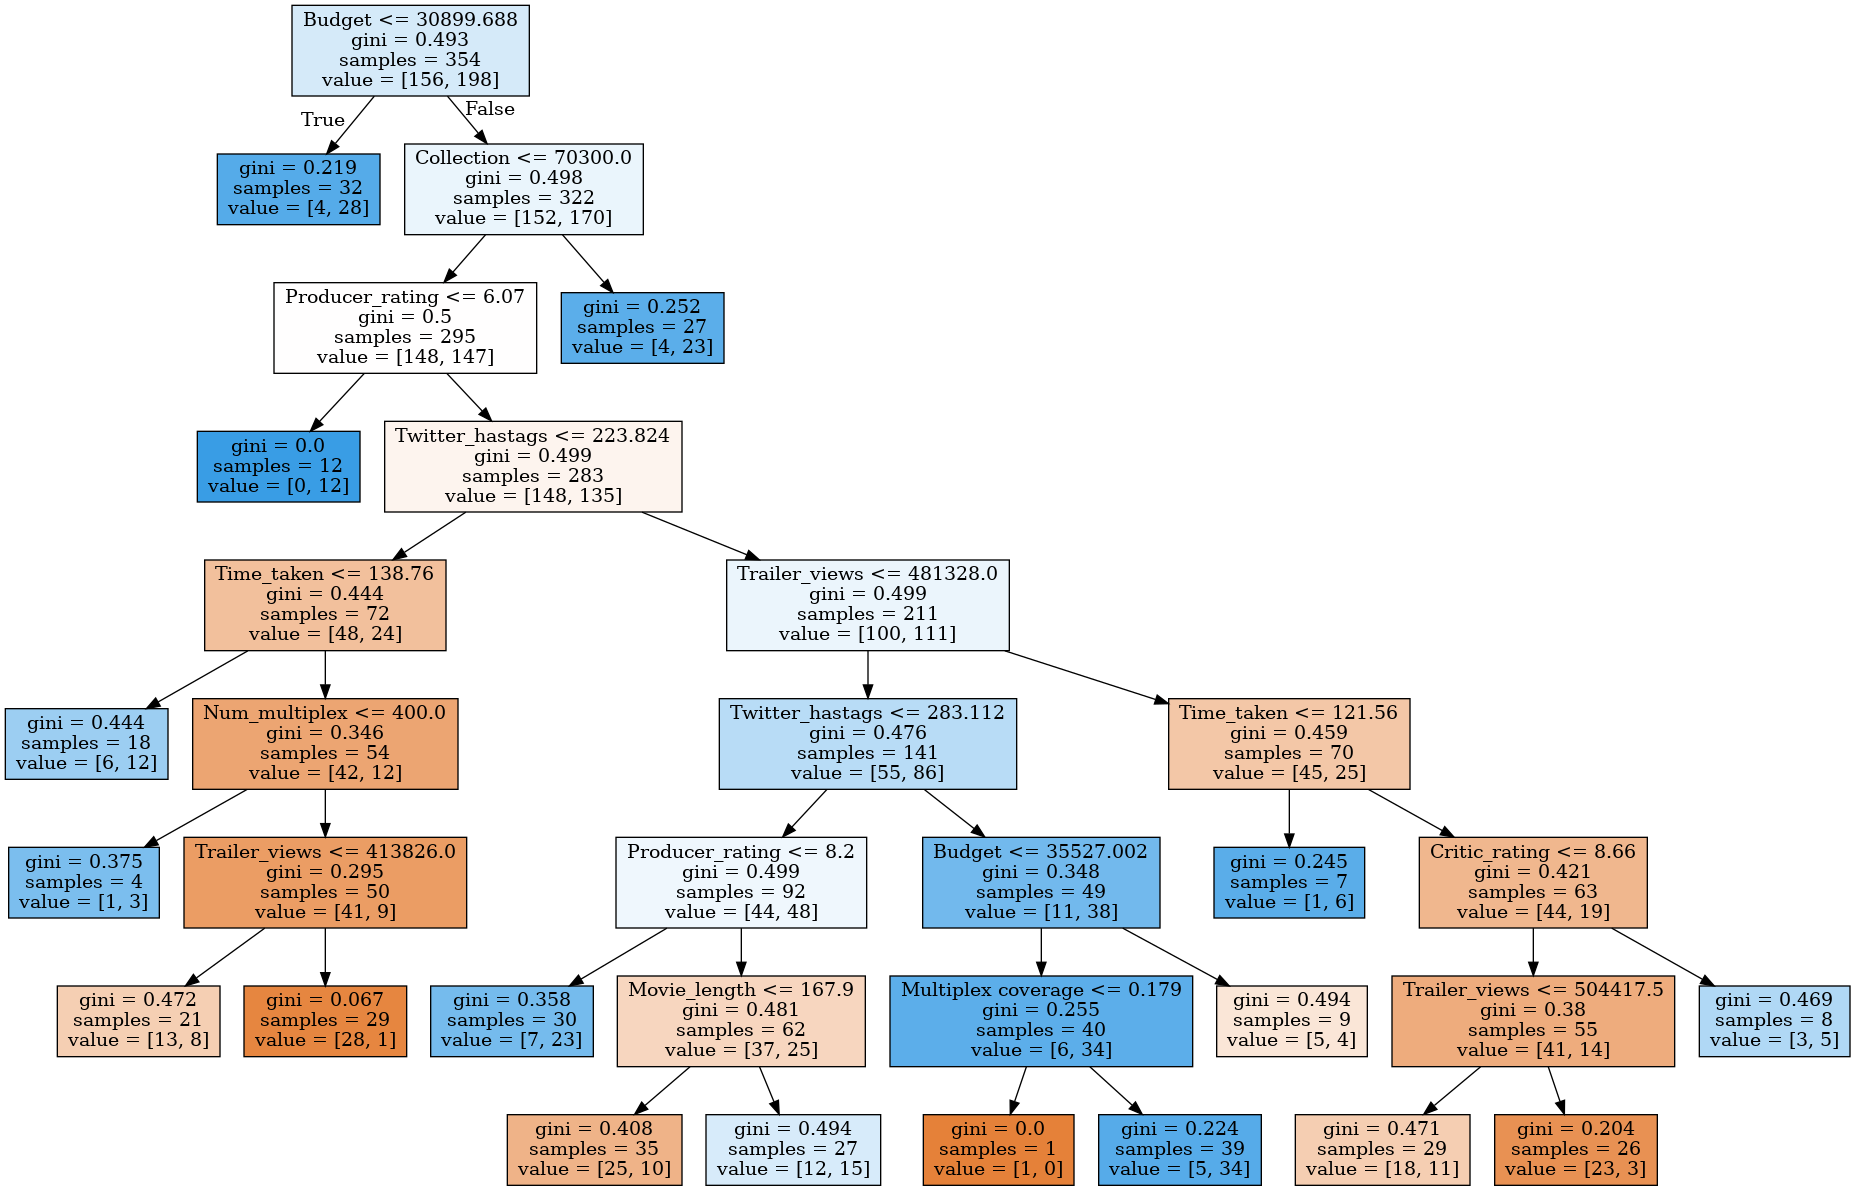

In [430]:
ptree2=tree.DecisionTreeClassifier(criterion='gini', min_samples_split=40)
ptree2.fit(X_train, y_train)
dot_data = tree.export_graphviz(ptree2, out_file=None, feature_names=X_train.columns, filled=True)

graph2=pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

### Minimum obervations at leaf nodes

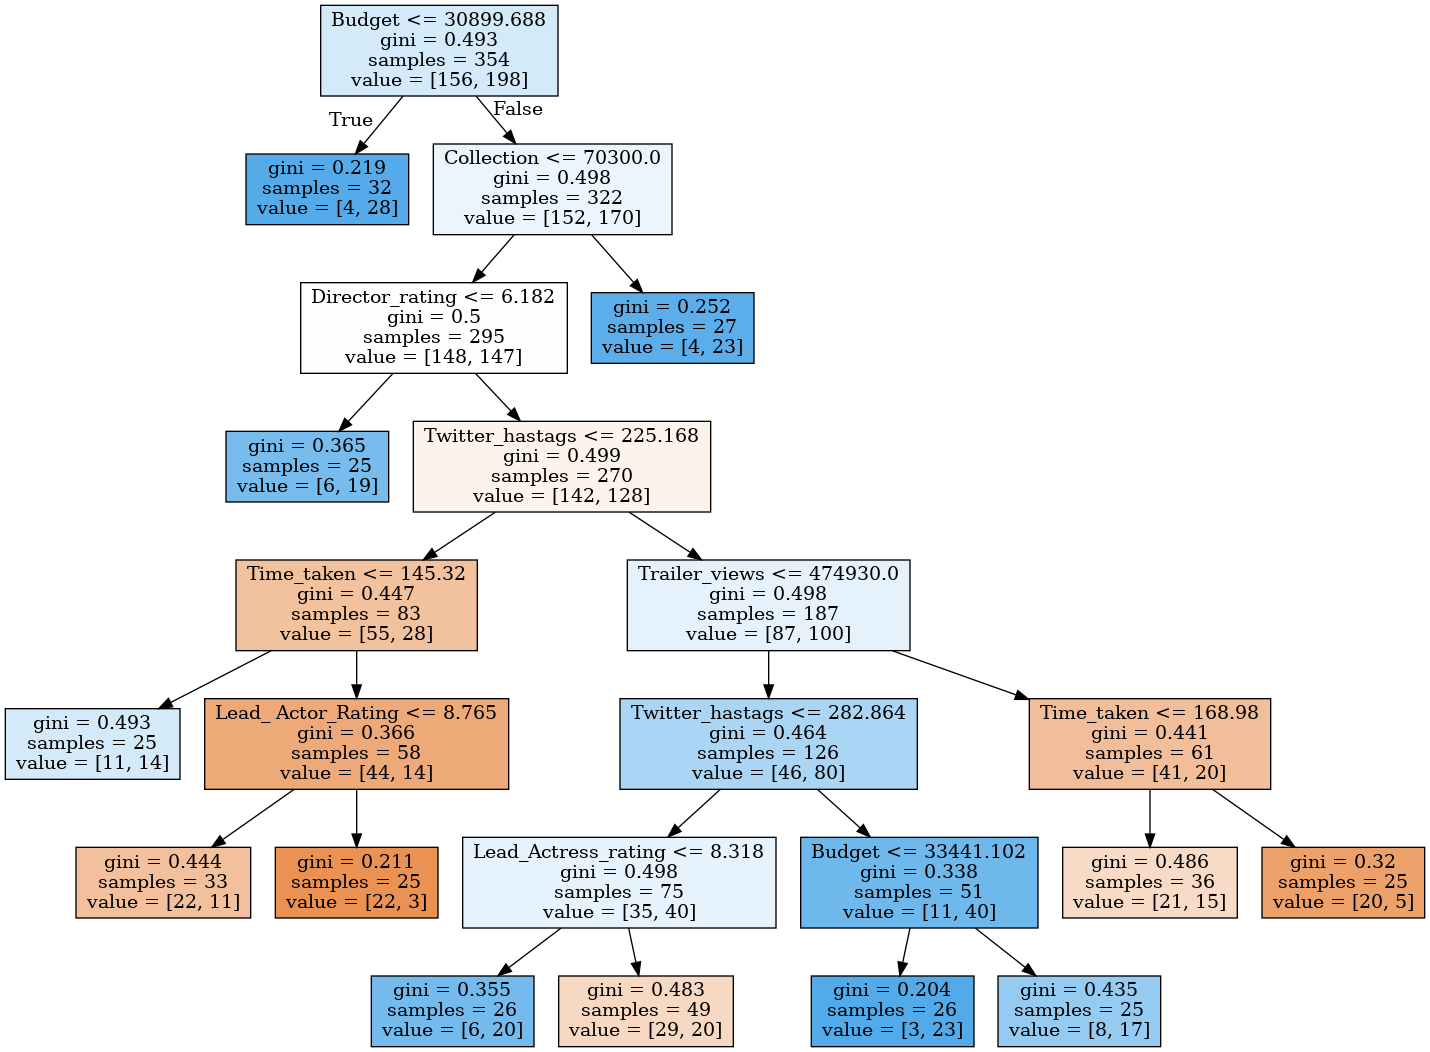

In [431]:
ptree3=tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf=25)
ptree3.fit(X_train, y_train)
dot_data = tree.export_graphviz(ptree3, out_file=None, feature_names=X_train.columns, filled=True)

graph3=pydotplus.graph_from_dot_data(dot_data)
Image(graph3.create_png())

In [538]:
ptree4=tree.DecisionTreeClassifier(criterion='gini',min_samples_split=5)
ptree4.fit(X_train, y_train)

ptree4.score(X_train, y_train)

0.980225988700565

<h1 align='center'> Observation </h1>

### Without pruning:
>Algorithms | Accuracy
>--- | ---
>ID3 | 66%
>CART | 63%
>C4.5 | 54%

### With pruning:
>Algorithms | Accuracy
>--- | ---
>ID3 | 98%
>CART | 98%
>C4.5 | 80%

Thus, we can say that:

**1. ID3 and CART are more suitable for decision tree classification in our dataset.**\
**2. Pruning can improve the accuracy of the classification and makes it much accurate. Thus, pruning is efficient.**
